In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [36]:
import tensorflow as tf
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt
import os

In [37]:
base_dir = '/content/drive/MyDrive/Image Classification using Transfer Learning /Skin cancer dataset'

train_image_set = '/content/drive/MyDrive/Image Classification using Transfer Learning /Skin cancer dataset/train'
train_benign_dir = '/content/drive/MyDrive/Image Classification using Transfer Learning /Skin cancer dataset/train/benign'
train_malign_dir = '/content/drive/MyDrive/Image Classification using Transfer Learning /Skin cancer dataset/train/malignant'

test_image_set = '/content/drive/MyDrive/Image Classification using Transfer Learning /Skin cancer dataset/test'
test_benign_dir = '/content/drive/MyDrive/Image Classification using Transfer Learning /Skin cancer dataset/test/benign'
test_malign_dir = '/content/drive/MyDrive/Image Classification using Transfer Learning /Skin cancer dataset/test/malignant'

valid_image_set = '/content/drive/MyDrive/Image Classification using Transfer Learning /Skin cancer dataset/validation'
valid_benign_dir = '/content/drive/MyDrive/Image Classification using Transfer Learning /Skin cancer dataset/validation/benign'
valid_malign_dir = '/content/drive/MyDrive/Image Classification using Transfer Learning /Skin cancer dataset/validation/malignant'

In [38]:
num_benign_train = len(os.listdir(train_benign_dir))
num_malignant_train = len(os.listdir(train_malign_dir))
num_benign_validaition = len(os.listdir(valid_benign_dir))
num_malignant_validation= len(os.listdir(valid_malign_dir))
num_benign_test = len(os.listdir(test_benign_dir))
num_malignant_test= len(os.listdir(test_malign_dir))

In [39]:
print("Total Training Benign Images",num_benign_train)
print("Total Training Malignant Images",num_malignant_train)
print("--")

print("Total validation Benign Images",num_benign_validaition)
print("Total validation Malignant Images",num_malignant_validation)
print("--")
print("Total Test Benign Images", num_benign_test)
print("Total Test Malignant Images",num_malignant_test)

total_train = num_benign_train+num_malignant_train
total_validation = num_benign_validaition+num_malignant_validation
total_test = num_benign_test+num_malignant_test

print("Total Training Images",total_train)
print("--")
print("Total Validation Images",total_validation)
print("--")
print("Total Testing Images",total_test)

Total Training Benign Images 1140
Total Training Malignant Images 937
--
Total validation Benign Images 300
Total validation Malignant Images 260
--
Total Test Benign Images 360
Total Test Malignant Images 300
Total Training Images 2077
--
Total Validation Images 560
--
Total Testing Images 660


In [40]:
train_image_set =  "/content/drive/MyDrive/Image Classification using Transfer Learning /Skin cancer dataset/train"
valid_image_set= "/content/drive/MyDrive/Image Classification using Transfer Learning /Skin cancer dataset/validation"
test_image_set = "/content/drive/MyDrive/Image Classification using Transfer Learning /Skin cancer dataset/test"

In [41]:
SIZE_X = SIZE_Y = 224

datagen = tf.keras.preprocessing.image.ImageDataGenerator(validation_split = 0.2)

train_set = datagen.flow_from_directory(train_image_set,
                                       class_mode = "categorical",
                                       target_size = (SIZE_X,SIZE_Y),
                                       color_mode="rgb",
                                       batch_size = 128, 
                                       shuffle = False,
                                       subset='training',
                                       seed = 42)

validate_set = datagen.flow_from_directory(valid_image_set,
                                       class_mode = "categorical",
                                       target_size = (SIZE_X, SIZE_Y),
                                       color_mode="rgb",
                                       batch_size = 128, 
                                       shuffle = False,
                                       subset='validation',
                                       seed = 42)

Found 1662 images belonging to 2 classes.
Found 112 images belonging to 2 classes.


In [42]:
IMAGE_SIZE = [224, 224]

In [43]:
resnet = ResNet50(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

In [44]:
# don't train existing weights
for layer in resnet.layers:
    layer.trainable = False

In [45]:
flatten = Flatten()(resnet.output)
dense = Dense(256, activation = 'relu')(flatten)
dense = Dropout(0.5)(dense)
dense = Dense(128, activation = 'relu')(dense)
dense = Dropout(0.3)(dense)
prediction = Dense(2, activation = 'softmax')(dense)

In [46]:
#creating a model
model = Model(inputs = resnet.input, outputs = prediction )

In [47]:
model.summary()

Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_4 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 230, 230, 3)  0           ['input_4[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 112, 112, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                                                                                            

In [48]:
model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

In [ ]:
history = model.fit_generator(train_set, validation_data = (validate_set), epochs = 12, verbose = 1)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  """Entry point for launching an IPython kernel.


Epoch 1/12
13/13 [==============================] - 301s 23s/step - loss: 23.8526 - accuracy: 0.4633 - val_loss: 1.3282 - val_accuracy: 0.6250
Epoch 2/12
13/13 [==============================] - 286s 22s/step - loss: 5.1151 - accuracy: 0.5788 - val_loss: 0.6925 - val_accuracy: 0.8482
Epoch 3/12
13/13 [==============================] - 290s 22s/step - loss: 1.6534 - accuracy: 0.7070 - val_loss: 0.6140 - val_accuracy: 0.8304
Epoch 4/12
13/13 [==============================] - 286s 22s/step - loss: 0.8293 - accuracy: 0.7028 - val_loss: 0.5071 - val_accuracy: 0.7411
Epoch 5/12
13/13 [==============================] - 287s 22s/step - loss: 0.5368 - accuracy: 0.7304 - val_loss: 0.4235 - val_accuracy: 0.8125
Epoch 6/12
13/13 [==============================] - 285s 22s/step - loss: 0.4657 - accuracy: 0.7671 - val_loss: 0.4013 - val_accuracy: 0.8214
Epoch 7/12
13/13 [==============================] - 282s 22s/step - loss: 0.4229 - accuracy: 0.7611 - val_loss: 0.4182 - val_accuracy: 0.8036
Epoch

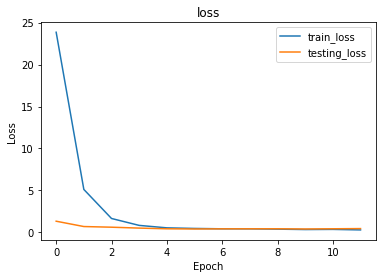

In [ ]:
# plotting the loss
plt.plot(history.history['loss'],label = 'train_loss')
plt.plot(history.history['val_loss'], label = 'testing_loss')
plt.title('loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

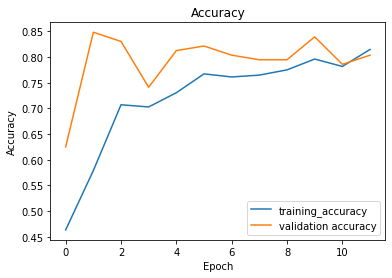

In [ ]:
# Both Validation and Training accuracy is shown here

plt.plot(history.history['accuracy'], label='training_accuracy')
plt.plot(history.history['val_accuracy'], label='validation accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Accuracy')
plt.legend()
plt.show()


In [ ]:
# CHECKING THE CONFUSION MATRIX

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
Y_pred = model.predict_generator(validate_set)
y_pred = np.argmax(Y_pred ,axis =1)
print('Confusion Matrix')
confusion_matrix = confusion_matrix(validate_set.classes, y_pred)
print(confusion_matrix)
print('Classification Report')
target_names = ['benign', 'malignant']
print(classification_report(validate_set.classes, y_pred, target_names=target_names))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  


Confusion Matrix
[[40 20]
 [ 2 50]]
Classification Report
              precision    recall  f1-score   support

      benign       0.95      0.67      0.78        60
   malignant       0.71      0.96      0.82        52

    accuracy                           0.80       112
   macro avg       0.83      0.81      0.80       112
weighted avg       0.84      0.80      0.80       112



In [ ]:
result = model.evaluate(validate_set,batch_size=128)
print("test_loss, test accuracy",result)

1/1 [==============================] - 17s 17s/step - loss: 0.4493 - accuracy: 0.8036
test_loss, test accuracy [0.44929930567741394, 0.8035714030265808]


Text(87.0, 0.5, 'Truth')

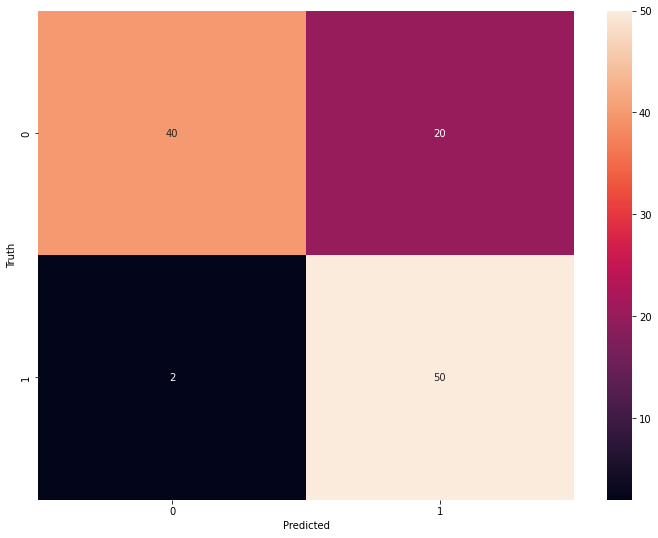

In [ ]:
# CHECKING THE CONFUSION MATRIX

import seaborn as sns

plt.figure(figsize = (12,9))
sns.heatmap(confusion_matrix, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')